In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib as mlp
%matplotlib inline

In [7]:
ir = pd.read_csv("Unemployment_Rate_upto_11_2020.csv") 
df = pd.read_csv("Unemployment in India.csv")
df

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0             11999139.0                                     43.24  Rural  
1             11755881.0                                     42.05  Rural  
2             12086707.0                                     43.50  Rural  
3             12285693.0                                     43.97  Rural  
4             12256762.0                                     44.68  Rural  
..                   ...                                       ...    ...  
763                  NaN                                       NaN    NaN  
764                  NaN                                       NaN    NaN  
765                  NaN                                       NaN    NaN  
766                  NaN                                       NaN    NaN  
767                  NaN                                       NaN    NaN  

[768 rows x 7 columns]

In [8]:
#from above we get to know that we have missing values
df.isna().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [9]:
df.dropna(inplace = True)
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.tail()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
749  West Bengal   29-02-2020    Monthly                              7.55   
750  West Bengal   31-03-2020    Monthly                              6.67   
751  West Bengal   30-04-2020    Monthly                             15.63   
752  West Bengal   31-05-2020    Monthly                             15.22   
753  West Bengal   30-06-2020    Monthly                              9.86   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
749           10871168.0                                     44.09  Urban  
750           10806105.0                                     43.34  Urban  
751            9299466.0                                     41.20  Urban  
752            9240903.0                                     40.67  Urban  
753            9088931.0                                     37.57  Urban

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [13]:
df.describe()

Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
max                                   72.570000

In [14]:
df.columns
df

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
749     West Bengal   29-02-2020    Monthly                              7.55   
750     West Bengal   31-03-2020    Monthly                              6.67   
751     West Bengal   30-04-2020    Monthly                             15.63   
752     West Bengal   31-05-2020    Monthly                             15.22   
753     West Bengal   30-06-2020    Monthly                              9.86   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0             11999139.0                                     43.24  Rural  
1             11755881.0                                     42.05  Rural  
2             12086707.0                                     43.50  Rural  
3             12285693.0                                     43.97  Rural  
4             12256762.0                                     44.68  Rural  
..                   ...                                       ...    ...  
749           10871168.0                                     44.09  Urban  
750           10806105.0                                     43.34  Urban  
751            9299466.0                                     41.20  Urban  
752            9240903.0                                     40.67  Urban  
753            9088931.0                                     37.57  Urban  

[740 rows x 7 columns]

In [15]:
df.columns = ("States", "Date", "Frequency", "Estimated Unemployment Rate", "Estimated Employed", 
               "Estimated Labour Participation Rate", "Area")
df

States         Date Frequency  Estimated Unemployment Rate  \
0    Andhra Pradesh   31-05-2019   Monthly                         3.65   
1    Andhra Pradesh   30-06-2019   Monthly                         3.05   
2    Andhra Pradesh   31-07-2019   Monthly                         3.75   
3    Andhra Pradesh   31-08-2019   Monthly                         3.32   
4    Andhra Pradesh   30-09-2019   Monthly                         5.17   
..              ...          ...       ...                          ...   
749     West Bengal   29-02-2020   Monthly                         7.55   
750     West Bengal   31-03-2020   Monthly                         6.67   
751     West Bengal   30-04-2020   Monthly                        15.63   
752     West Bengal   31-05-2020   Monthly                        15.22   
753     West Bengal   30-06-2020   Monthly                         9.86   

     Estimated Employed  Estimated Labour Participation Rate   Area  
0            11999139.0                                43.24  Rural  
1            11755881.0                                42.05  Rural  
2            12086707.0                                43.50  Rural  
3            12285693.0                                43.97  Rural  
4            12256762.0                                44.68  Rural  
..                  ...                                  ...    ...  
749          10871168.0                                44.09  Urban  
750          10806105.0                                43.34  Urban  
751           9299466.0                                41.20  Urban  
752           9240903.0                                40.67  Urban  
753           9088931.0                                37.57  Urban  

[740 rows x 7 columns]

In [16]:
ir.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129     79.74  
2    15.9129     79.74  
3    15.9129     79.74  
4    15.9129     79.74

In [17]:
ir.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

In [18]:
ir.columns =["States", "Date", "Frequency", "Estimated Unemployment Rate", "Estimated Employed", 
               "Estimated Labour Participation Rate", "Region", "logitude","latitude"]
ir

States         Date Frequency  Estimated Unemployment Rate  \
0    Andhra Pradesh   31-01-2020         M                         5.48   
1    Andhra Pradesh   29-02-2020         M                         5.83   
2    Andhra Pradesh   31-03-2020         M                         5.79   
3    Andhra Pradesh   30-04-2020         M                        20.51   
4    Andhra Pradesh   31-05-2020         M                        17.43   
..              ...          ...       ...                          ...   
262     West Bengal   30-06-2020         M                         7.29   
263     West Bengal   31-07-2020         M                         6.83   
264     West Bengal   31-08-2020         M                        14.87   
265     West Bengal   30-09-2020         M                         9.35   
266     West Bengal   31-10-2020         M                         9.98   

     Estimated Employed  Estimated Labour Participation Rate Region  logitude  \
0              16635535                                41.02  South   15.9129   
1              16545652                                40.90  South   15.9129   
2              15881197                                39.18  South   15.9129   
3              11336911                                33.10  South   15.9129   
4              12988845                                36.46  South   15.9129   
..                  ...                                  ...    ...       ...   
262            30726310                                40.39   East   22.9868   
263            35372506                                46.17   East   22.9868   
264            33298644                                47.48   East   22.9868   
265            35707239                                47.73   East   22.9868   
266            33962549                                45.63   East   22.9868   

     latitude  
0      79.740  
1      79.740  
2      79.740  
3      79.740  
4      79.740  
..        ...  
262    87.855  
263    87.855  
264    87.855  
265    87.855  
266    87.855  

[267 rows x 9 columns]

In [19]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unemployment Rate          267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   logitude                             267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [20]:
ir.duplicated().sum()

0

In [21]:
ir.describe()

Estimated Unemployment Rate  Estimated Employed  \
count                   267.000000        2.670000e+02   
mean                     12.236929        1.396211e+07   
std                      10.803283        1.336632e+07   
min                       0.500000        1.175420e+05   
25%                       4.845000        2.838930e+06   
50%                       9.650000        9.732417e+06   
75%                      16.755000        2.187869e+07   
max                      75.850000        5.943376e+07   

       Estimated Labour Participation Rate    logitude    latitude  
count                           267.000000  267.000000  267.000000  
mean                             41.681573   22.826048   80.532425  
std                               7.845419    6.270731    5.831738  
min                              16.770000   10.850500   71.192400  
25%                              37.265000   18.112400   76.085600  
50%                              40.390000   23.610200   79.019300  
75%                              44.055000   27.278400   85.279900  
max                              69.690000   33.778200   92.937600

In [22]:
ir['States'].value_counts().idxmin()

'Sikkim'

In [23]:
print(df['States'].value_counts().idxmax())
ir['States'].value_counts().idxmax()

Andhra Pradesh


'Andhra Pradesh'

In [24]:
df['States'].value_counts().idxmin()

'Chandigarh'

In [25]:
print(df.shape) 
ir.info()

(740, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               267 non-null    object 
 1   Date                                 267 non-null    object 
 2   Frequency                            267 non-null    object 
 3   Estimated Unemployment Rate          267 non-null    float64
 4   Estimated Employed                   267 non-null    int64  
 5   Estimated Labour Participation Rate  267 non-null    float64
 6   Region                               267 non-null    object 
 7   logitude                             267 non-null    float64
 8   latitude                             267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [26]:
import datetime as dt
import calendar

ir['Date'] = pd.to_datetime(ir['Date'], dayfirst= True)
ir['month_no'] = ir['Date'].dt.month
ir['month'] = ir['month_no'].apply(lambda x: calendar.month_abbr[x])

In [27]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   States                               267 non-null    object        
 1   Date                                 267 non-null    datetime64[ns]
 2   Frequency                            267 non-null    object        
 3   Estimated Unemployment Rate          267 non-null    float64       
 4   Estimated Employed                   267 non-null    int64         
 5   Estimated Labour Participation Rate  267 non-null    float64       
 6   Region                               267 non-null    object        
 7   logitude                             267 non-null    float64       
 8   latitude                             267 non-null    float64       
 9   month_no                             267 non-null    int32         
 10  month         

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   States                               740 non-null    object 
 1   Date                                 740 non-null    object 
 2   Frequency                            740 non-null    object 
 3   Estimated Unemployment Rate          740 non-null    float64
 4   Estimated Employed                   740 non-null    float64
 5   Estimated Labour Participation Rate  740 non-null    float64
 6   Area                                 740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [29]:
import pandas as pd
import calendar

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract the month number
df['month_int'] = df['Date'].dt.month

# Map the month number to the month abbreviation
df['month'] = df['month_int'].apply(lambda x: calendar.month_abbr[x])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   States                               740 non-null    object        
 1   Date                                 740 non-null    datetime64[ns]
 2   Frequency                            740 non-null    object        
 3   Estimated Unemployment Rate          740 non-null    float64       
 4   Estimated Employed                   740 non-null    float64       
 5   Estimated Labour Participation Rate  740 non-null    float64       
 6   Area                                 740 non-null    object        
 7   month_int                            740 non-null    int32         
 8   month                                740 non-null    object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(4)
memory usage: 54.9+ KB


In [30]:
df

States       Date Frequency  Estimated Unemployment Rate  \
0    Andhra Pradesh 2019-05-31   Monthly                         3.65   
1    Andhra Pradesh 2019-06-30   Monthly                         3.05   
2    Andhra Pradesh 2019-07-31   Monthly                         3.75   
3    Andhra Pradesh 2019-08-31   Monthly                         3.32   
4    Andhra Pradesh 2019-09-30   Monthly                         5.17   
..              ...        ...       ...                          ...   
749     West Bengal 2020-02-29   Monthly                         7.55   
750     West Bengal 2020-03-31   Monthly                         6.67   
751     West Bengal 2020-04-30   Monthly                        15.63   
752     West Bengal 2020-05-31   Monthly                        15.22   
753     West Bengal 2020-06-30   Monthly                         9.86   

     Estimated Employed  Estimated Labour Participation Rate   Area  \
0            11999139.0                                43.24  Rural   
1            11755881.0                                42.05  Rural   
2            12086707.0                                43.50  Rural   
3            12285693.0                                43.97  Rural   
4            12256762.0                                44.68  Rural   
..                  ...                                  ...    ...   
749          10871168.0                                44.09  Urban   
750          10806105.0                                43.34  Urban   
751           9299466.0                                41.20  Urban   
752           9240903.0                                40.67  Urban   
753           9088931.0                                37.57  Urban   

     month_int month  
0            5   May  
1            6   Jun  
2            7   Jul  
3            8   Aug  
4            9   Sep  
..         ...   ...  
749          2   Feb  
750          3   Mar  
751          4   Apr  
752          5   May  
753          6   Jun  

[740 rows x 9 columns]

In [31]:
print("maximum : ",df["month"].value_counts().idxmax())
print("minimum : ",df["month"].value_counts().idxmin())

maximum :  May
minimum :  Apr


In [32]:
print("maximum : ", ir["month"].value_counts().idxmax())
print("minimum : ", ir["month"].value_counts().idxmin())

maximum :  Mar
minimum :  Jan


In [33]:
#removing unwanted columns
df.drop(columns = ["Frequency","month_int"])

States       Date  Estimated Unemployment Rate  \
0    Andhra Pradesh 2019-05-31                         3.65   
1    Andhra Pradesh 2019-06-30                         3.05   
2    Andhra Pradesh 2019-07-31                         3.75   
3    Andhra Pradesh 2019-08-31                         3.32   
4    Andhra Pradesh 2019-09-30                         5.17   
..              ...        ...                          ...   
749     West Bengal 2020-02-29                         7.55   
750     West Bengal 2020-03-31                         6.67   
751     West Bengal 2020-04-30                        15.63   
752     West Bengal 2020-05-31                        15.22   
753     West Bengal 2020-06-30                         9.86   

     Estimated Employed  Estimated Labour Participation Rate   Area month  
0            11999139.0                                43.24  Rural   May  
1            11755881.0                                42.05  Rural   Jun  
2            12086707.0                                43.50  Rural   Jul  
3            12285693.0                                43.97  Rural   Aug  
4            12256762.0                                44.68  Rural   Sep  
..                  ...                                  ...    ...   ...  
749          10871168.0                                44.09  Urban   Feb  
750          10806105.0                                43.34  Urban   Mar  
751           9299466.0                                41.20  Urban   Apr  
752           9240903.0                                40.67  Urban   May  
753           9088931.0                                37.57  Urban   Jun  

[740 rows x 7 columns]

In [34]:
ir.drop(columns = ["Frequency","month_no"])

States       Date  Estimated Unemployment Rate  \
0    Andhra Pradesh 2020-01-31                         5.48   
1    Andhra Pradesh 2020-02-29                         5.83   
2    Andhra Pradesh 2020-03-31                         5.79   
3    Andhra Pradesh 2020-04-30                        20.51   
4    Andhra Pradesh 2020-05-31                        17.43   
..              ...        ...                          ...   
262     West Bengal 2020-06-30                         7.29   
263     West Bengal 2020-07-31                         6.83   
264     West Bengal 2020-08-31                        14.87   
265     West Bengal 2020-09-30                         9.35   
266     West Bengal 2020-10-31                         9.98   

     Estimated Employed  Estimated Labour Participation Rate Region  logitude  \
0              16635535                                41.02  South   15.9129   
1              16545652                                40.90  South   15.9129   
2              15881197                                39.18  South   15.9129   
3              11336911                                33.10  South   15.9129   
4              12988845                                36.46  South   15.9129   
..                  ...                                  ...    ...       ...   
262            30726310                                40.39   East   22.9868   
263            35372506                                46.17   East   22.9868   
264            33298644                                47.48   East   22.9868   
265            35707239                                47.73   East   22.9868   
266            33962549                                45.63   East   22.9868   

     latitude month  
0      79.740   Jan  
1      79.740   Feb  
2      79.740   Mar  
3      79.740   Apr  
4      79.740   May  
..        ...   ...  
262    87.855   Jun  
263    87.855   Jul  
264    87.855   Aug  
265    87.855   Sep  
266    87.855   Oct  

[267 rows x 9 columns]

In [35]:
# Sort the DataFrame by 'Estimated Unemployment Rate' in descending order
top_states = ir.sort_values(by='Estimated Unemployment Rate', ascending=False)

# Keep only the columns 'States' and 'Estimated Unemployment Rate' and remove duplicate states
top_states = top_states[['States', 'Estimated Unemployment Rate']].drop_duplicates(subset='States')

# Take the top 27 states with the highest unemployment rates
top_27_states = top_states.head(27)

# Reset the index to make the output more readable
top_27_states.reset_index(drop=True, inplace=True)

# Display the result
top_27_states[['States', 'Estimated Unemployment Rate']]

States  Estimated Unemployment Rate
0         Puducherry                        75.85
1          Jharkhand                        59.23
2         Tamil Nadu                        49.83
3              Bihar                        46.64
4            Haryana                        43.22
5              Delhi                        42.27
6            Tripura                        41.23
7          Karnataka                        29.84
8             Punjab                        28.33
9   Himachal Pradesh                        26.95
10            Sikkim                        24.51
11         Rajasthan                        24.15
12            Odisha                        23.76
13       Uttarakhand                        22.26
14    Madhya Pradesh                        21.98
15     Uttar Pradesh                        21.54
16               Goa                        21.25
17   Jammu & Kashmir                        21.08
18       Maharashtra                        20.90
19    Andhra Pradesh                        20.51
20           Gujarat                        18.71
21            Kerala                        17.88
22       West Bengal                        17.41
23         Telangana                        14.70
24      Chhattisgarh                        14.23
25             Assam                        11.06
26         Meghalaya                        10.03

In [36]:
df1 = df[['States', 'Estimated Unemployment Rate']].groupby('States').sum().sort_values('Estimated Unemployment Rate', ascending= False)
ir1 = ir[['States', 'Estimated Unemployment Rate']].groupby('States').sum().sort_values('Estimated Unemployment Rate', ascending= False)
df1.head(10) 


Estimated Unemployment Rate
States                                       
Tripura                                793.81
Haryana                                735.93
Jharkhand                              576.38
Bihar                                  529.71
Himachal Pradesh                       519.13
Delhi                                  461.87
Rajasthan                              393.63
Uttar Pradesh                          351.44
Jammu & Kashmir                        339.96
Punjab                                 336.87

In [37]:
ir1.head(10)

Estimated Unemployment Rate
States                                       
Haryana                                274.77
Tripura                                250.55
Jharkhand                              195.39
Bihar                                  194.71
Delhi                                  184.14
Puducherry                             179.42
Himachal Pradesh                       160.65
Rajasthan                              158.68
Jammu & Kashmir                        148.30
Tamil Nadu                             121.87

In [38]:
df2 = df[['month', 'Estimated Unemployment Rate']].groupby('month').sum().sort_values('Estimated Unemployment Rate', ascending= False)
ir2 = ir[['month', 'Estimated Unemployment Rate']].groupby('month').sum().sort_values('Estimated Unemployment Rate', ascending= False)
df2

Estimated Unemployment Rate
month                             
May                        1747.85
Apr                        1205.72
Jun                        1097.56
Mar                         556.43
Oct                         544.55
Nov                         542.76
Feb                         528.13
Jan                         527.39
Aug                         510.81
Dec                         503.36
Jul                         487.83
Sep                         470.69

In [39]:
ir2

Estimated Unemployment Rate
month                             
May                         627.60
Apr                         578.14
Jun                         294.60
Mar                         291.13
Aug                         278.46
Jul                         265.53
Feb                         240.92
Jan                         239.11
Sep                         235.06
Oct                         216.71

In [40]:
df

States       Date Frequency  Estimated Unemployment Rate  \
0    Andhra Pradesh 2019-05-31   Monthly                         3.65   
1    Andhra Pradesh 2019-06-30   Monthly                         3.05   
2    Andhra Pradesh 2019-07-31   Monthly                         3.75   
3    Andhra Pradesh 2019-08-31   Monthly                         3.32   
4    Andhra Pradesh 2019-09-30   Monthly                         5.17   
..              ...        ...       ...                          ...   
749     West Bengal 2020-02-29   Monthly                         7.55   
750     West Bengal 2020-03-31   Monthly                         6.67   
751     West Bengal 2020-04-30   Monthly                        15.63   
752     West Bengal 2020-05-31   Monthly                        15.22   
753     West Bengal 2020-06-30   Monthly                         9.86   

     Estimated Employed  Estimated Labour Participation Rate   Area  \
0            11999139.0                                43.24  Rural   
1            11755881.0                                42.05  Rural   
2            12086707.0                                43.50  Rural   
3            12285693.0                                43.97  Rural   
4            12256762.0                                44.68  Rural   
..                  ...                                  ...    ...   
749          10871168.0                                44.09  Urban   
750          10806105.0                                43.34  Urban   
751           9299466.0                                41.20  Urban   
752           9240903.0                                40.67  Urban   
753           9088931.0                                37.57  Urban   

     month_int month  
0            5   May  
1            6   Jun  
2            7   Jul  
3            8   Aug  
4            9   Sep  
..         ...   ...  
749          2   Feb  
750          3   Mar  
751          4   Apr  
752          5   May  
753          6   Jun  

[740 rows x 9 columns]

In [41]:
ir4 = ir[['month', 'Estimated Employed']].groupby('month').sum().sort_values('Estimated Employed', ascending=False)
ir4

Estimated Employed
month                    
Jan             406567194
Feb             402694917
Sep             393871643
Oct             393659474
Mar             392543817
Aug             389584135
Jul             389286580
Jun             374149633
May             310699661
Apr             274825174

In [42]:
df5 = df[['month', 'Estimated Employed']].groupby('month').sum().sort_values('Estimated Employed', ascending=False)
df5

Estimated Employed
month                    
Jun           766717078.0
May           699995530.0
Jan           406899254.0
Feb           403011803.0
Sep           402452126.0
Oct           401411032.0
Nov           400051335.0
Jul           399838967.0
Aug           399610205.0
Dec           391001555.0
Mar           390862219.0
Apr           269449315.0

Text(0, 0.5, 'no of people Unemployed %')

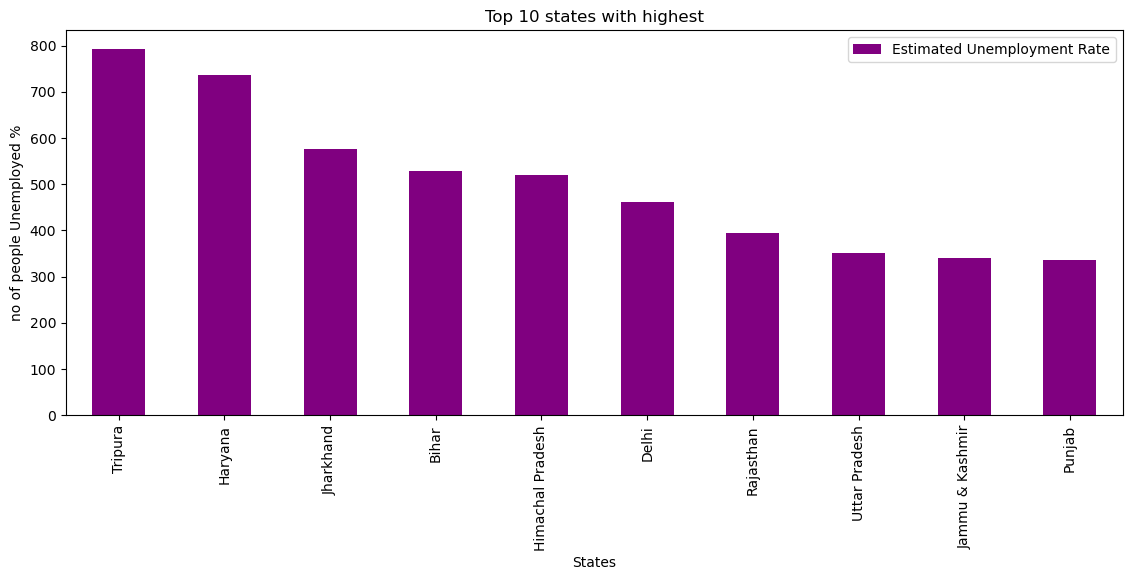

In [43]:
fig= plt.figure()
g= fig.add_subplot(1,2,1)
df1[:10].plot(kind='bar',color= 'purple', figsize=(30,5), ax=g)
g.set_title('Top 10 states with highest')
g.set_xlabel('States')
g.set_ylabel("no of people Unemployed %")

Text(0, 0.5, 'no of people Unemployed %')

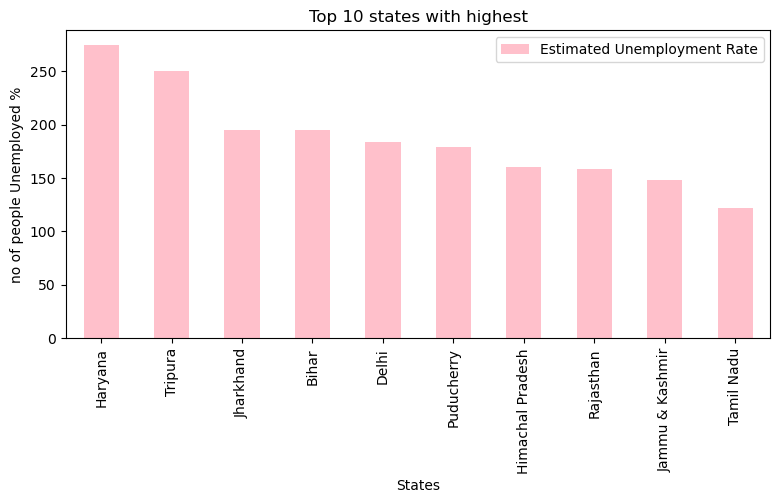

In [44]:
fig= plt.figure()
g= fig.add_subplot(1,2,1)
ir1[:10].plot(kind='bar',color= 'pink', figsize=(20,4), ax=g)
g.set_title('Top 10 states with highest')
g.set_xlabel('States')
g.set_ylabel("no of people Unemployed %")

Text(0, 0.5, 'no of people Unemployed %')

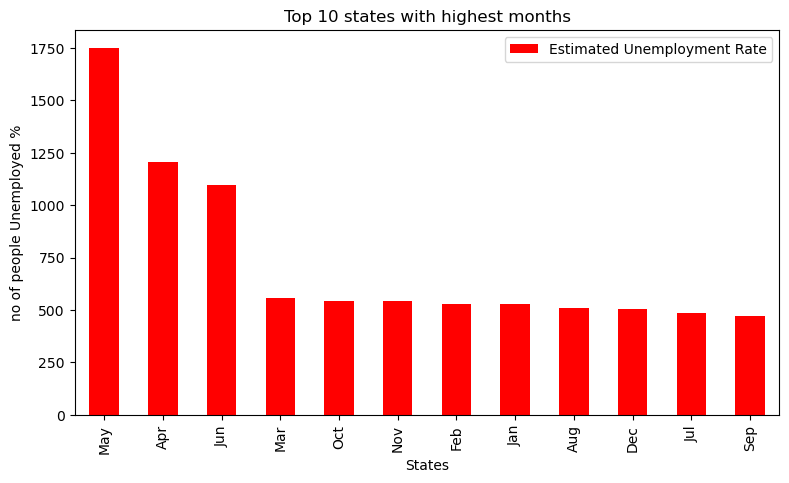

In [45]:
# Create a new figure
fig = plt.figure()

# Add a subplot (g) to the figure. This subplot will be positioned in the first column of a 1x2 grid.
g = fig.add_subplot(1, 2, 1)

# Create a bar plot using the first 12 rows of the DataFrame 'df2'. The bars will be green, and the figure size is set to (20, 5).
df2[:12].plot(kind='bar', color='red', figsize=(20, 5), ax=g)

# Set the title for the subplot 'g'
g.set_title('Top 10 states with highest months')

# Set the label for the x-axis of the subplot 'g'
g.set_xlabel('States')

# Set the label for the y-axis of the subplot 'g'
g.set_ylabel("no of people Unemployed %")

Text(0, 0.5, 'no of people Unemployed %')

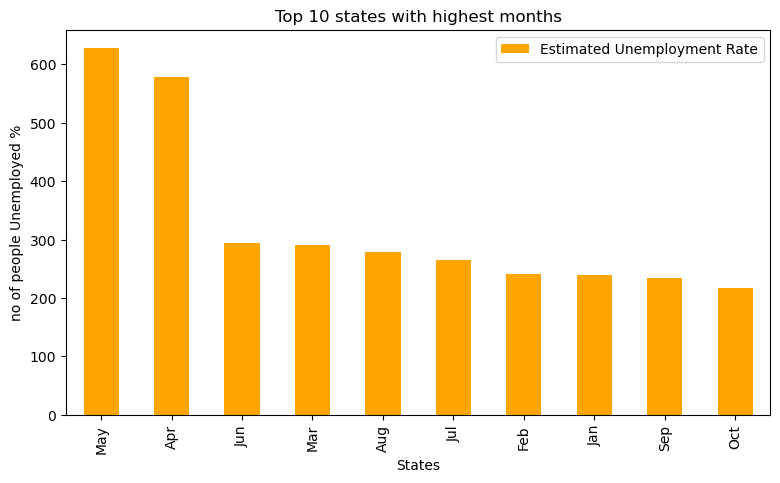

In [46]:
fig= plt.figure()
g= fig.add_subplot(1,2,1)
ir2[:12].plot(kind='bar',color= 'orange', figsize=(20,5), ax=g)
g.set_title('Top 10 states with highest months')
g.set_xlabel('States')
g.set_ylabel("no of people Unemployed %")

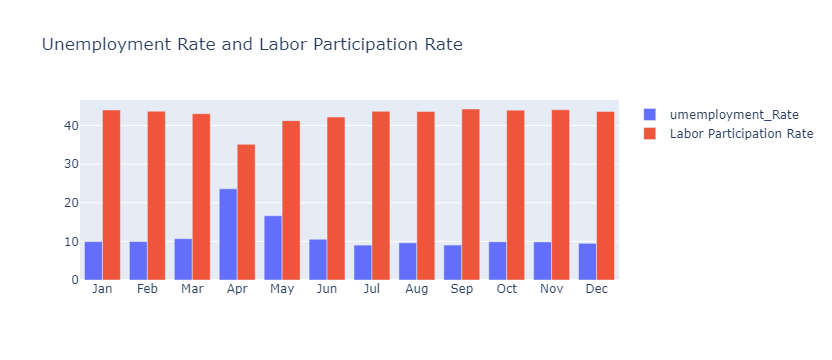

In [47]:
df3 = df.groupby(['month'])[['Estimated Unemployment Rate',
                             'Estimated Employed','Estimated Labour Participation Rate']].mean()
df3 = pd.DataFrame(df3).reset_index()
month = df3.month
unemployment_rate = df3['Estimated Unemployment Rate']
labor_participation_rate = df3['Estimated Labour Participation Rate']

fig = go.Figure()             
fig.add_trace(go.Bar(x = month, y = unemployment_rate, name = 'umemployment_Rate'))                      
fig.add_trace(go.Bar(x = month, y = labor_participation_rate, name = 'Labor Participation Rate'))       
fig.update_layout(title='Unemployment Rate and Labor Participation Rate', 
                  xaxis={'categoryorder':'array', 'categoryarray':['Jan','Feb',
                                                                   'Mar','Apr','May','Jun',
                                                                   'Jul','Aug','Sep','Oct',
                                                                   'Nov','Dec']})

fig.show()

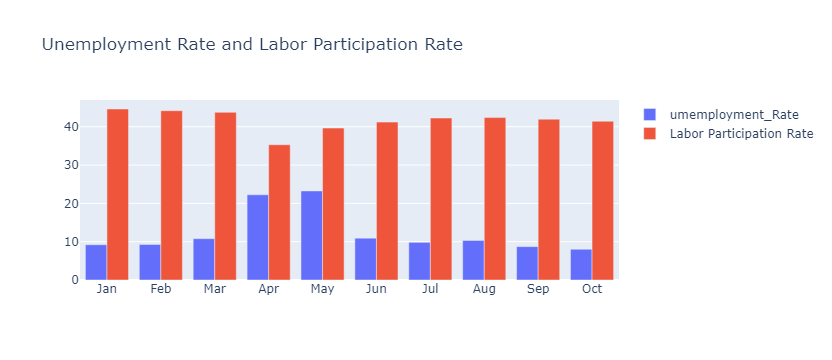

In [48]:
ir3 = ir.groupby(['month'])[['Estimated Unemployment Rate',
                             'Estimated Employed','Estimated Labour Participation Rate']].mean()
ir3 = pd.DataFrame(ir3).reset_index()
month = ir3.month
unemployment_rate = ir3['Estimated Unemployment Rate']
labor_participation_rate = ir3['Estimated Labour Participation Rate']

fig = go.Figure()             
fig.add_trace(go.Bar(x = month, y = unemployment_rate, name = 'umemployment_Rate'))                      
fig.add_trace(go.Bar(x = month, y = labor_participation_rate, name = 'Labor Participation Rate'))       
fig.update_layout(title='Unemployment Rate and Labor Participation Rate', 
                  xaxis={'categoryorder':'array', 'categoryarray':['Jan','Feb',
                                                                   'Mar','Apr','May','Jun',
                                                                   'Jul','Aug','Sep','Oct',
                                                                   'Nov','Dec']})

fig.show()

In [49]:
df.columns

Index(['States', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Area',
       'month_int', 'month'],
      dtype='object')

Text(0, 0.5, 'Number of Estimated Employed')

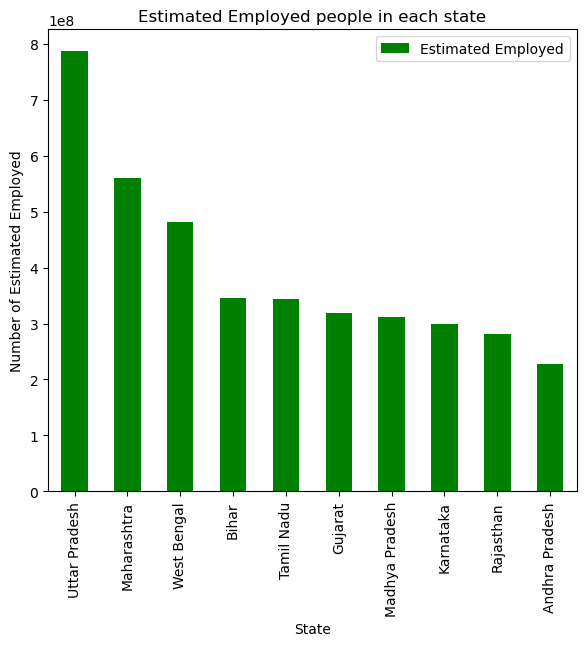

In [50]:
# state wise Estimated Employed visualization

df4 = df[['States','Estimated Employed']].groupby('States').sum().sort_values('Estimated Employed', ascending=False)
df4.head(10)
fig = plt.figure()
gg = fig.add_subplot(1, 2, 2)  # The second subplot (gg) will be positioned in the second column

# Employed
df4[:10].plot(kind='bar', color='green', figsize=(15, 6), ax=gg)
gg.set_title('Estimated Employed people in each state')
gg.set_xlabel('State')
gg.set_ylabel('Number of Estimated Employed')

Text(0, 0.5, 'Number of Estimated Employed people')

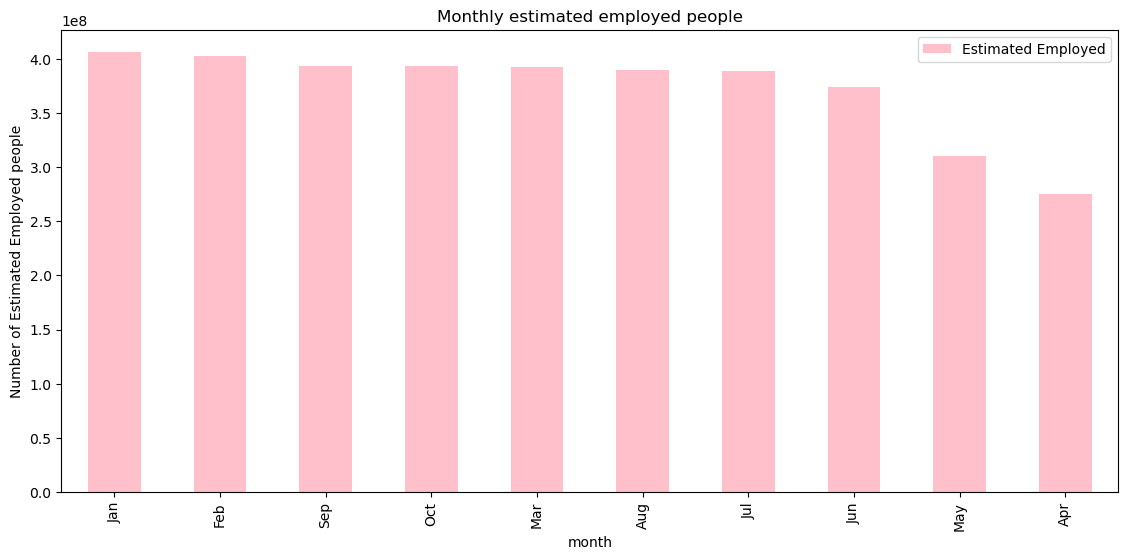

In [51]:
# Estimated Employed month wise visualization

ir5 = ir[['month','Estimated Employed']].groupby('month').sum().sort_values('Estimated Employed', ascending=False)
ir5.head(10)
fig=plt.figure()
tt=fig.add_subplot(1,2,2)   # The second subplot (tt) will be positioned in the second column

ir5[:10].plot(kind='bar',color='pink', figsize=(30,6), ax=tt)
tt.set_title('Estimated Employed people in each Month')
tt.set_title('Monthly estimated employed people')
tt.set_ylabel('Number of Estimated Employed people')

Text(0, 0.5, 'Number of Estimated Employed people')

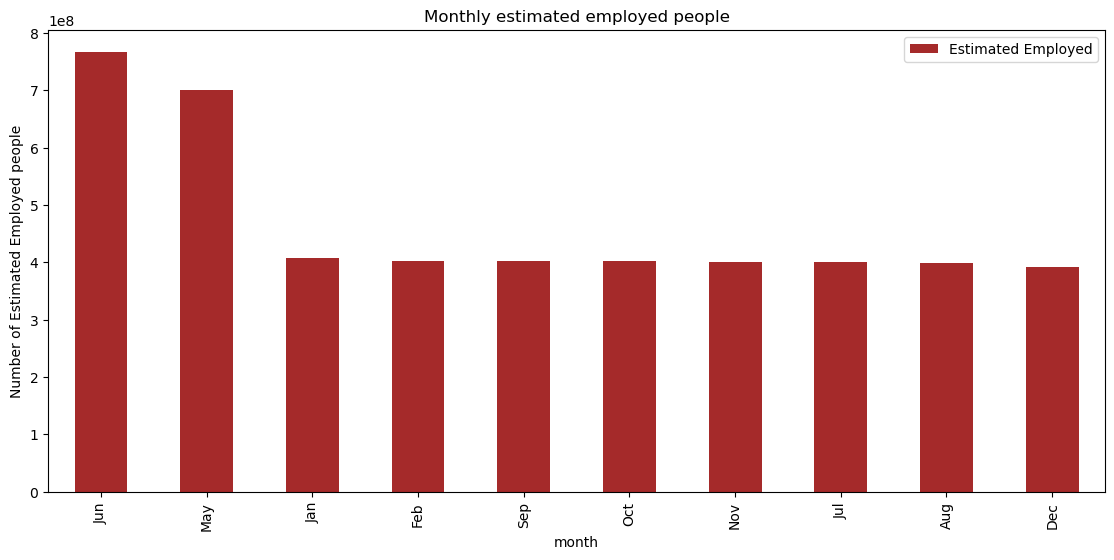

In [52]:
# Estimated Employed month wise visualization

df5 = df[['month','Estimated Employed']].groupby('month').sum().sort_values('Estimated Employed', ascending=False)
df5.head(10)
fig=plt.figure()
tt=fig.add_subplot(1,2,2)   # The second subplot (tt) will be positioned in the second column

df5[:10].plot(kind='bar',color='brown', figsize=(30,6), ax=tt)
tt.set_title('Estimated Employed people in each Month')
tt.set_title('Monthly estimated employed people')
tt.set_ylabel('Number of Estimated Employed people')

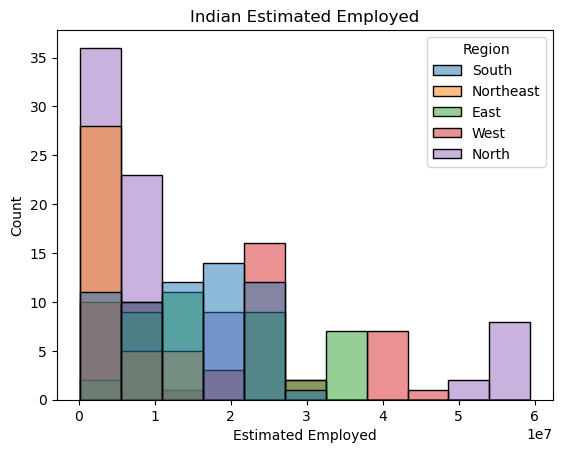

In [53]:
plt.title("Indian Estimated Employed")
sns.histplot(x= "Estimated Employed", hue= "Region", data = ir)
plt.show()

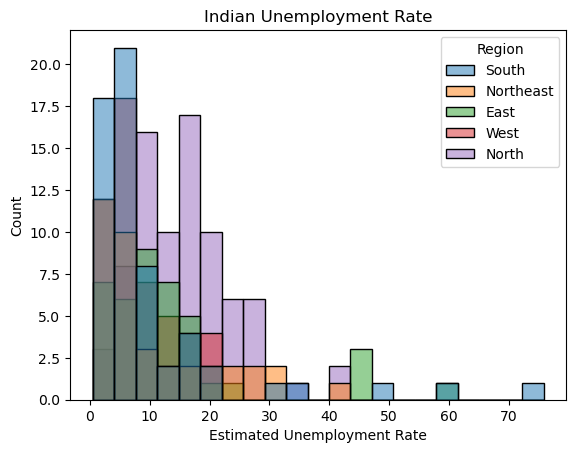

In [54]:
plt.title("Indian Unemployment Rate")
sns.histplot(x="Estimated Unemployment Rate", hue= "Region", data = ir)
plt.show()

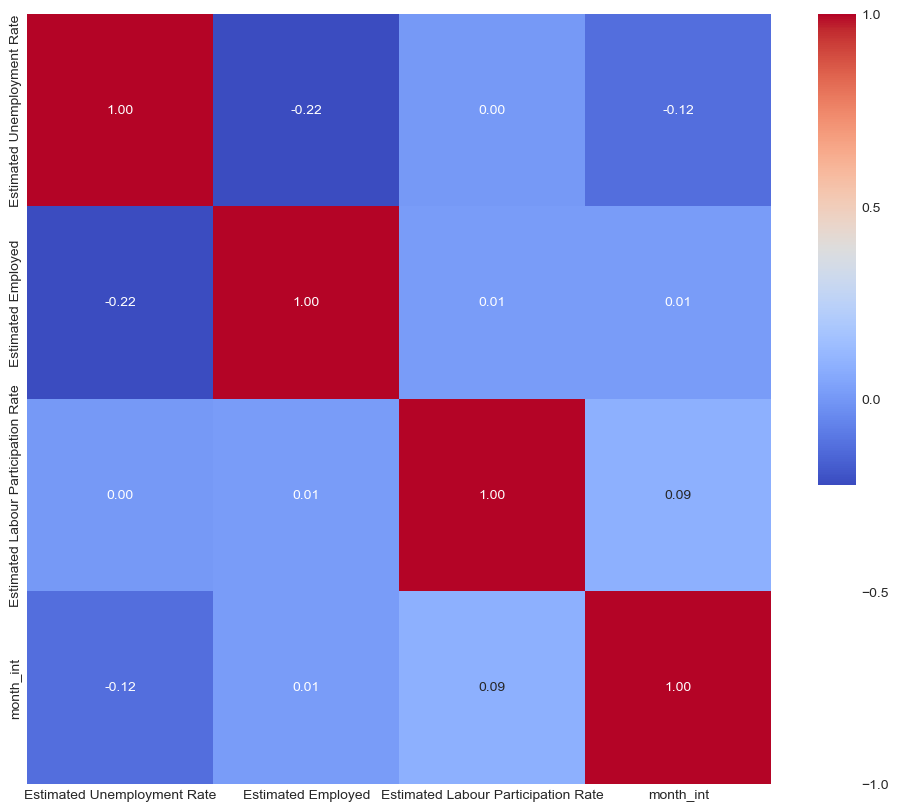

In [55]:
numerical_cols = df.select_dtypes(include=[np.number])
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12, 10))

# Create the heatmap and annotate it
heatmap = sns.heatmap(numerical_cols.corr(), annot=True, fmt=".2f", cmap="coolwarm")

# Adjust the color bar for better visibility
cbar = heatmap.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])

plt.show()

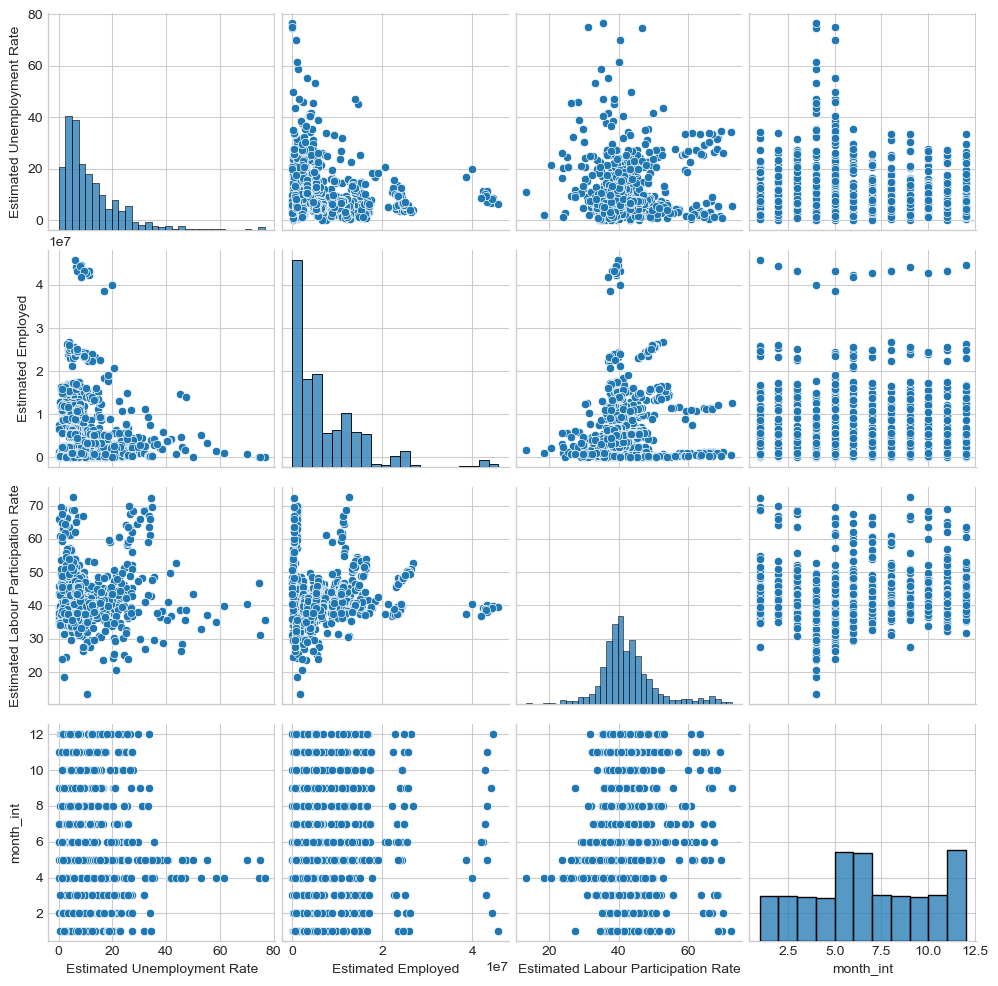

In [56]:
sns.pairplot(df)

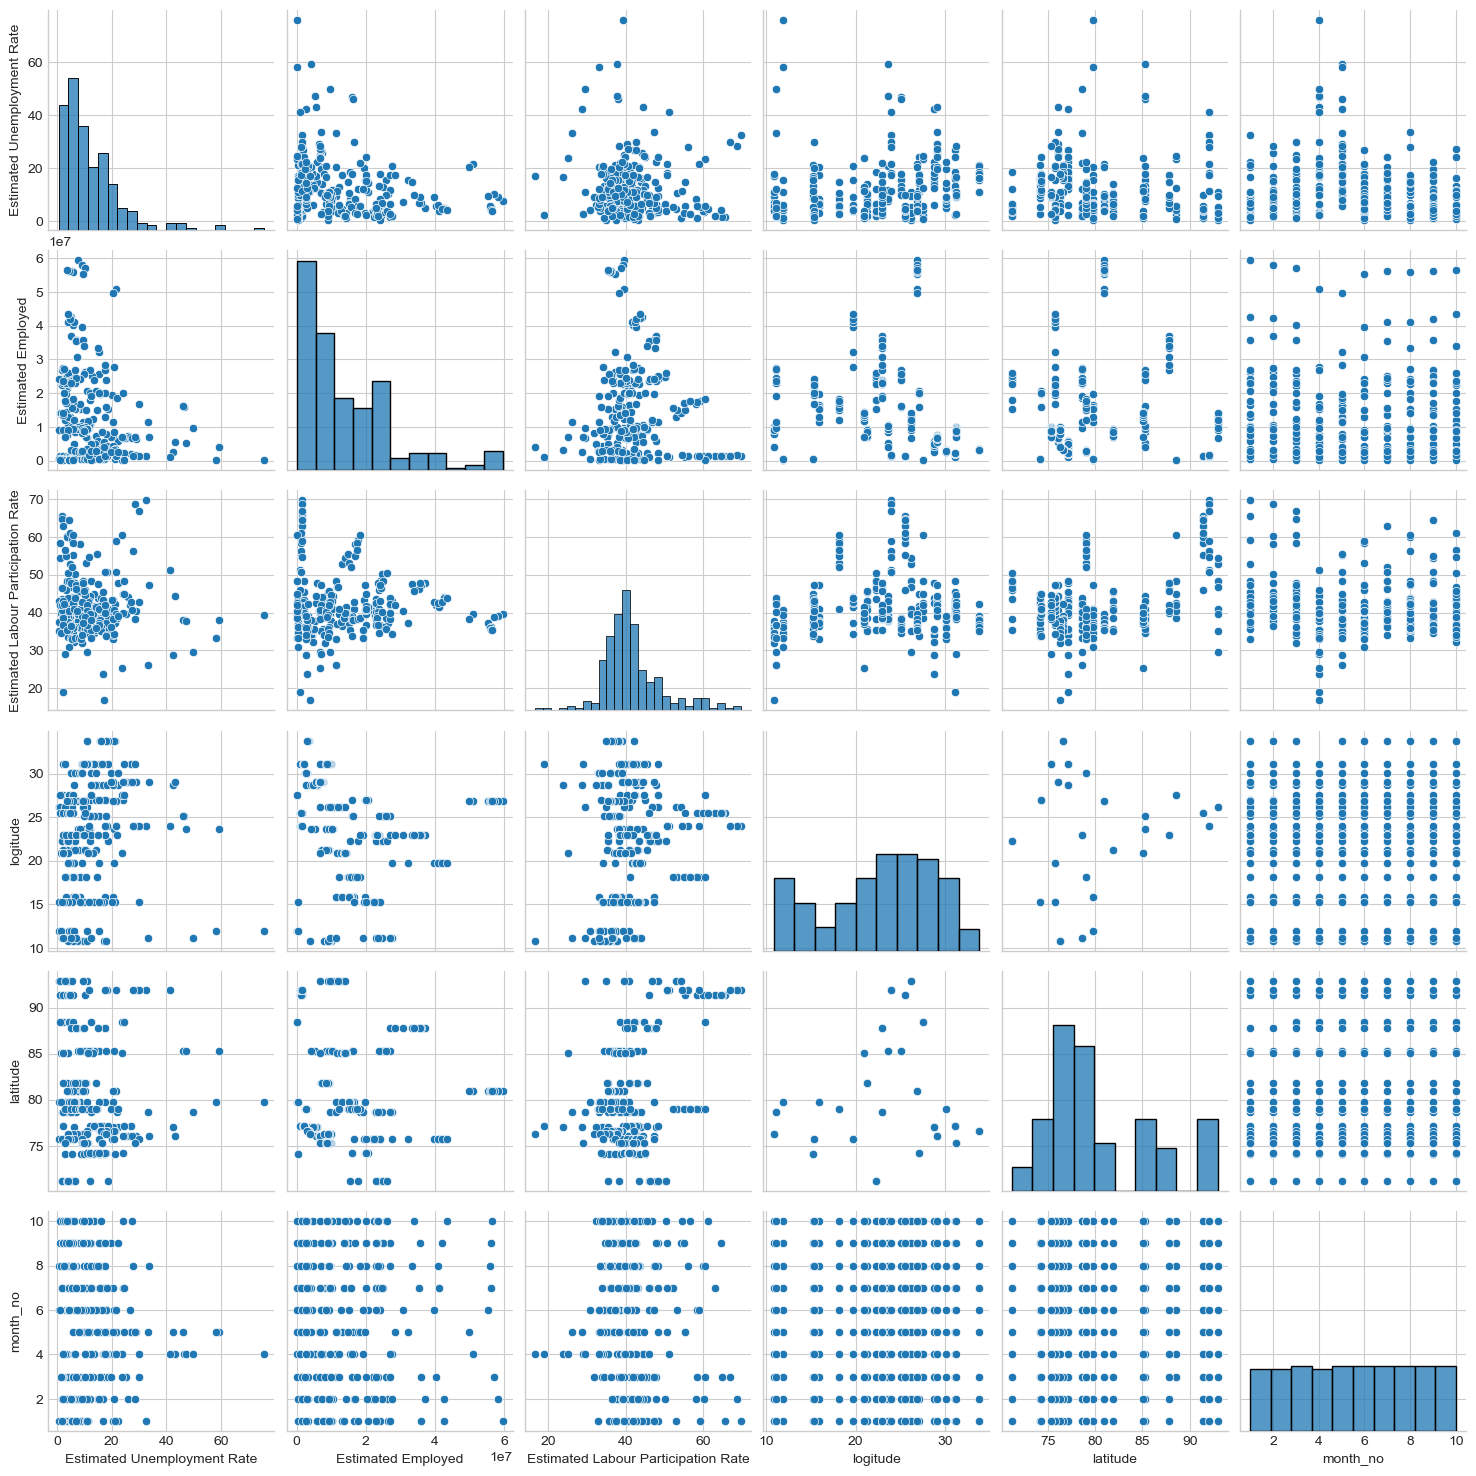

In [57]:
sns.pairplot(ir)

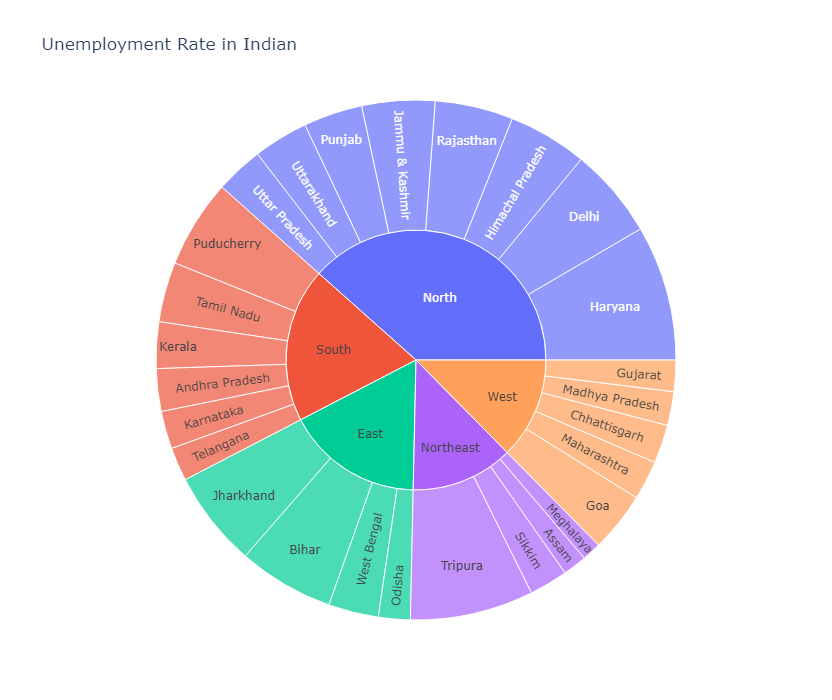

In [58]:
# Create a new DataFrame 'unemployment' containing columns 'States', 'Region', and 'Estimated Unemployment Rate' from the DataFrame 'ir'
unemployment = ir[["States", "Region", "Estimated Unemployment Rate"]]

# Created a sunburst chart using the Plotly Express library
# The chart is based on the 'unemployment' DataFrame.
# The 'path' parameter defines the hierarchical path for the sunburst chart.
# The 'values' parameter specifies the values associated with each sunburst segment.
# Set the width and height of the chart to 700x700 pixels.
# Set the title of the chart to "Unemployment Rate in Indian."
figure = px.sunburst(unemployment, path=["Region", "States"], values="Estimated Unemployment Rate",
                      width=700, height=700, title="Unemployment Rate in Indian")

# Display the sunburst chart
figure.show()

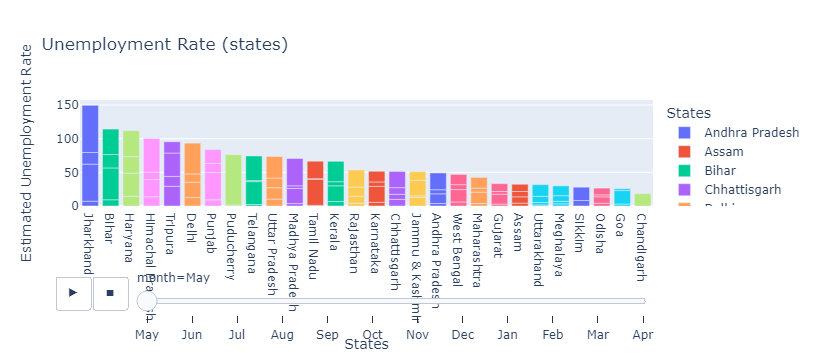

In [59]:
# Create an animated bar chart using Plotly Express (fig) 
# The x-axis represents 'States,' and the y-axis represents 'Estimated Unemployment Rate.'
# The animation is based on the 'month' column, and the color of bars is based on 'States.'
# The title of the chart is set to 'Unemployment Rate (states).'
fig = px.bar(df, x='States', y='Estimated Unemployment Rate', animation_frame='month', 
             color='States', title='Unemployment Rate (states)')

# Update the layout of the figure to order the x-axis categories in descending order.
# The xaxis category order is set to 'total descending,' arranging the states in descending order of total values.
# The update_layout() method is used to modify various layout properties of the figure.
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Modify the duration of each frame in the animation to 2000 milliseconds (2 seconds).
# This code accesses the buttons in the update menu and changes the frame duration.
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000

# Display the animated bar chart.
fig.show()

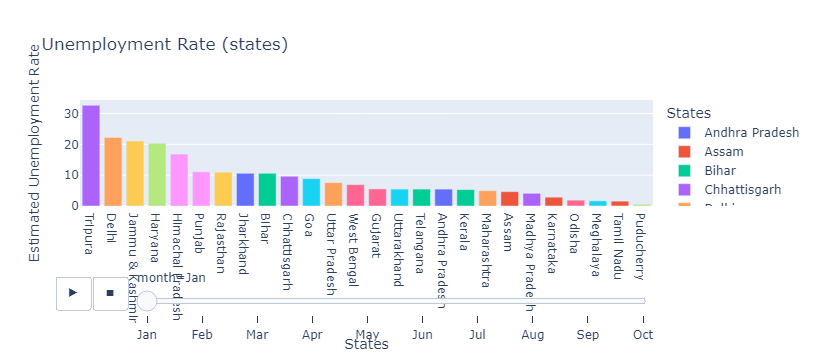

In [60]:
fig = px.bar(ir, x='States', y='Estimated Unemployment Rate', animation_frame='month', 
             color='States', title = 'Unemployment Rate (states)')   
fig.update_layout(xaxis={'categoryorder':'total descending'})                                                                                     
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration']=2000 ;fig.show() 